In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

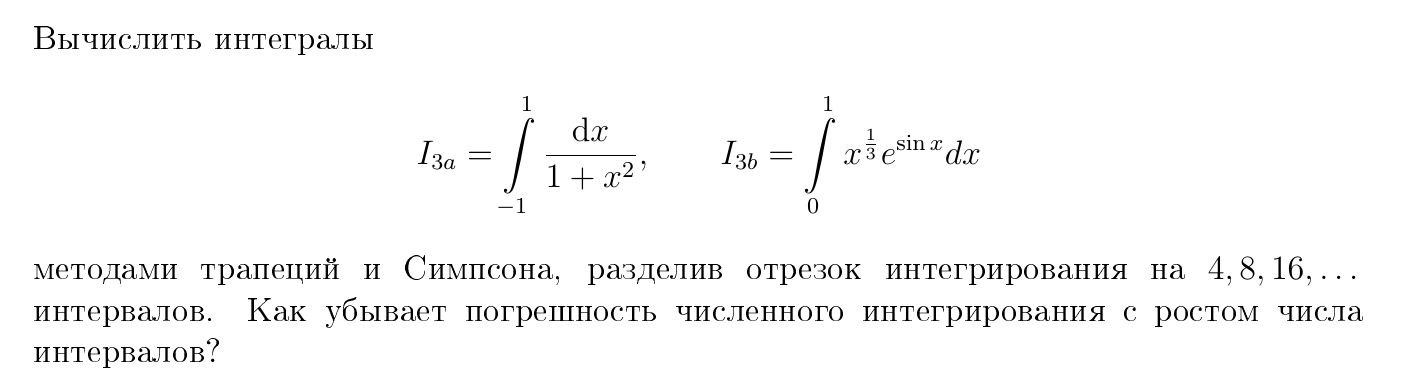

In [2]:
Image(filename='task 3.png')

In [3]:
def f(x):
    return 1/(1 + pow(x, 2))

def g(x):
    return pow(x, 1/3) * np.exp(np.sin(x))

In [4]:
n = 1024

a_left = -1
a_right = 1

b_left = 0
b_right = 1

In [5]:
def Trapeze(func, left, right, n_intervals):
    vfunc = np.vectorize(func)

    h = (right-left)/n_intervals
    dots = np.arange(left, right+h, h)
    values = vfunc(dots)

    res = (values[0] + values[-1])/2
    res += np.sum(values[1:-1])
    res *= h
    return res

In [6]:
print("Trapeze method for integral A gives result %1.10f using %d intervals" %
      (Trapeze(f, a_left, a_right, n), n))

print("Trapeze method for integral B gives result %1.10f using %d intervals" %
      (Trapeze(g, b_left, b_right, n), n))

Trapeze method for integral A gives result 1.5707960089 using 1024 intervals
Trapeze method for integral B gives result 1.2958472950 using 1024 intervals


$\LARGE$
For Trapeze method $\Large\displaystyle R \sim \frac{1}{N^2}$

In [7]:
def Simpson(func, left, right, n_intervals):
    vfunc = np.vectorize(func)

    h = (right-left)/n_intervals
    dots = np.arange(left, right+h, h)
    values = vfunc(dots)

    res = values[0] + values[-1]
    res += np.sum([values[i]*pow(2, i%2+1) for i in range(1, n_intervals)])
    # for i in range(1, n_intervals):
    #     if i%2:
    #         res += values[i]*4
    #     else:
    #         res += values[i]*2

    res *= (h/3)
    return res

In [8]:
print("Simpson method for integral A gives result %1.10f using %d intervals" %
      (Simpson(f, a_left, a_right, n), n))

print("Simpson method for integral B gives result %1.10f using %d intervals" %
      (Simpson(g, b_left, b_right, n), n))

Simpson method for integral A gives result 1.5707963268 using 1024 intervals
Simpson method for integral B gives result 1.2958607523 using 1024 intervals


$\LARGE$
For Simpson method $\Large\displaystyle R \sim \frac{1}{N^4}$

In [9]:
def GetDiffs(splits, method, func, l, r, calc_step):
    res = []

    for i in splits:
        cur = method(func, l, r, i)
        prev = method(func, l, r, i+step)

        res.append(abs(cur-prev))
    return res

In [10]:
divs_from = 2
divs_to = 18
step = 24

divs = [pow(2, i) for i in range(divs_from, divs_to)]

trapeze_f_diffs = GetDiffs(divs, Trapeze, f, a_left, a_right, step)
simpson_f_diffs = GetDiffs(divs, Simpson, f, a_left, a_right, step)

trapeze_g_diffs = GetDiffs(divs, Trapeze, g, b_left, b_right, step)
simpson_g_diffs = GetDiffs(divs, Simpson, g, b_left, b_right, step)

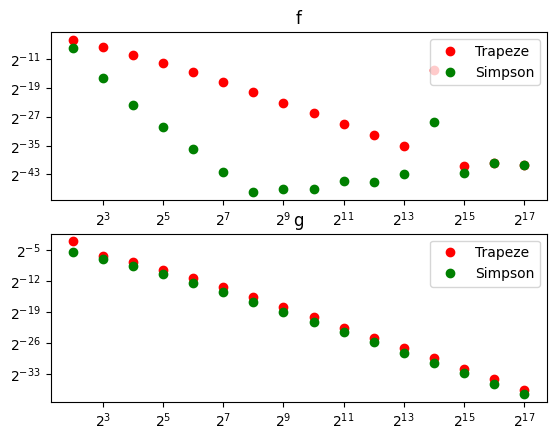

In [11]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(divs, trapeze_f_diffs, 'ro', label='Trapeze')
axs[0].plot(divs, simpson_f_diffs, 'go', label='Simpson')
# axs[0].set_ylim([0, 0.5])
axs[0].legend(loc="upper right")
axs[0].set_title('f')
axs[0].set_xscale('log', base=2)
axs[0].set_yscale('log', base=2)

axs[1].plot(divs, trapeze_g_diffs, 'ro', label='Trapeze')
axs[1].plot(divs, simpson_g_diffs, 'go', label='Simpson')
axs[1].legend(loc="upper right")
axs[1].set_title('g')
axs[1].set_xscale('log', base=2)
axs[1].set_yscale('log', base=2)

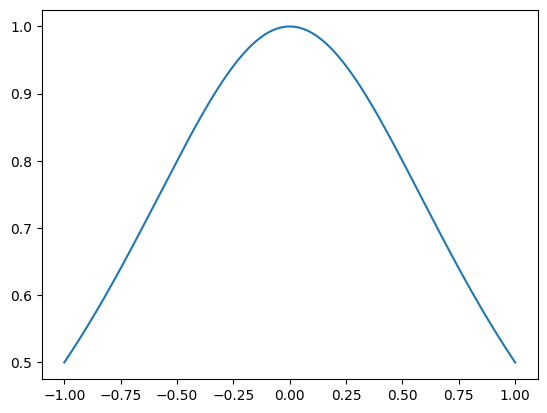

In [12]:
t = np.linspace(a_left, a_right, n)
plt.plot(t, f(t))

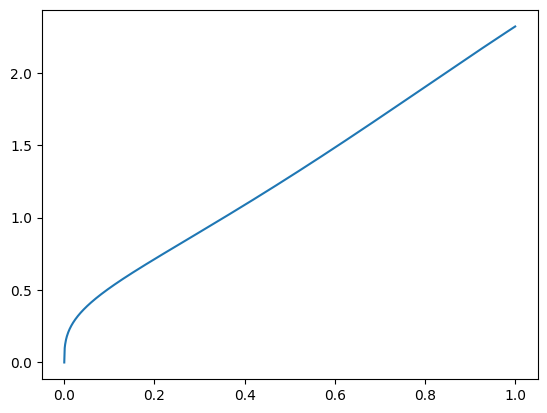

In [13]:
t = np.linspace(b_left, b_right, n)
plt.plot(t, g(t))